<a href="https://colab.research.google.com/github/tokaalaa/DM_Course/blob/main/Topology_Mapping_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
!pip install pyitlib
from pyitlib import discrete_random_variable as drv
import math


  Created wheel for pyitlib: filename=pyitlib-0.2.2-cp36-none-any.whl size=28503 sha256=c61e34ad0585389d46163d47aebfd91e97f583c38287e273f6feb63ef771d4ba
  Stored in directory: /root/.cache/pip/wheels/1c/f8/41/f4b4e777dd6ea714f2c4900367fb479e9fca0eb000c46e73f3
Successfully built pyitlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Load Topology**

In [ ]:
N = 10
filename = '/content/drive/My Drive/DM2/Dataset/t_10_1.txt'
with open(filename, 'r') as f:
    l = [[int(num) for num in line.split(' ')] for line in f]
topology = np.array(l)

#**Visualization**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize(N,labels):
  colors = ['#ffe6ee','#ff80aa','#bcbcbc','#cc3300','red','green','blue',
            'purple','black', 'yellow','magenta', 'cyan','#F0E442',
            '#c4ff4d', '#6699ff','#ccccff','#f0b3ff', '#d2a679','#003300',
            '#cccc00','#b3ffcc','#00264d','#002266','#ffcc80','#006666'] 
  G = nx.Graph()  # Create empty graph
  
  G.add_nodes_from([i for i in range(1,N+1)])  # Add nodes
  
  color_map = []
  # coloring nodes
  i = 0
  for node in G:
        color_map.append(colors[labels[i]])
        i= i + 1

  # Add edges
  for i in range(len(topology)):
    G.add_edge(topology[i,0], topology[i,1], weight=topology[i,2])

  
  # Create drawing
  #spring_layout(G)
  pos = nx.shell_layout(G)  # List of positions of nodes
  weights = nx.get_edge_attributes(G, "weight") # List of weights
  nx.draw_networkx(G, pos, node_color=color_map, with_labels=True)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

  plt.title("Basic Graphs with Networkx")
  plt.gcf().canvas.set_window_title("")  # Hide window title
  
  # Display Graph
  plt.show()
 

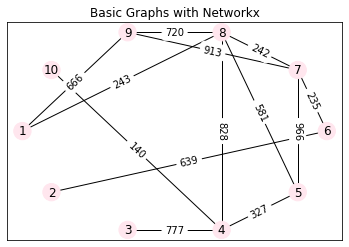

In [ ]:
l = np.zeros((N)).astype(int)
visualize(N,l)

# **Spectral clustring**

In [ ]:
A = np.zeros((N, N))
for i in range(len(topology)):
  A[topology[i,0] - 1,topology[i,1] - 1] = topology[i,2]
  A[topology[i,1] - 1,topology[i,0] - 1] = topology[i,2]
A

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0., 243., 666.,   0.],
       [  0.,   0.,   0.,   0.,   0., 639.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 777.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 777.,   0., 327.,   0.,   0., 828.,   0., 140.],
       [  0.,   0.,   0., 327.,   0.,   0., 966., 581.,   0.,   0.],
       [  0., 639.,   0.,   0.,   0.,   0., 235.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 966., 235.,   0., 242., 913.,   0.],
       [243.,   0.,   0., 828., 581.,   0., 242.,   0., 720.,   0.],
       [666.,   0.,   0.,   0.,   0.,   0., 913., 720.,   0.,   0.],
       [  0.,   0.,   0., 140.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
def Spectral_Clustring(k = 3):

    print("A= "+ str(A) + "\n")

    D = A.sum(axis = 1)
    D = np.diag(D)
    print("D= "+ str(D) + "\n")

    L = D - A
    

    eigvals, eigvecs = np.linalg.eig(L)
    sortedIndex = np.argsort(eigvals)
    eigvals = eigvals[sortedIndex]
    eigvecs= eigvecs[:, sortedIndex]
    print("eigvals= " + str(eigvals) + "\n")
    print("eigvecs= " + str(eigvecs) + "\n")


    U = eigvecs[:, 0:k]
    print("U= " + str(U) + "\n")

    Y = normalize(U, axis = 1)
    print("Y= " + str(Y) + "\n")

    kmeans = KMeans(n_clusters=k).fit(Y)
    label = kmeans.labels_
    print(kmeans.labels_)
    return label  

In [ ]:
label = Spectral_Clustring(k = 2)

A= [[  0.   0.   0.   0.   0.   0.   0. 243. 666.   0.]
 [  0.   0.   0.   0.   0. 639.   0.   0.   0.   0.]
 [  0.   0.   0. 777.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 777.   0. 327.   0.   0. 828.   0. 140.]
 [  0.   0.   0. 327.   0.   0. 966. 581.   0.   0.]
 [  0. 639.   0.   0.   0.   0. 235.   0.   0.   0.]
 [  0.   0.   0.   0. 966. 235.   0. 242. 913.   0.]
 [243.   0.   0. 828. 581.   0. 242.   0. 720.   0.]
 [666.   0.   0.   0.   0.   0. 913. 720.   0.   0.]
 [  0.   0.   0. 140.   0.   0.   0.   0.   0.   0.]]

D= [[ 909.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  639.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  777.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. 2072.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. 1874.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  874.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. 2356.    0.    0.    0.]
 [   0.    0.    0.  

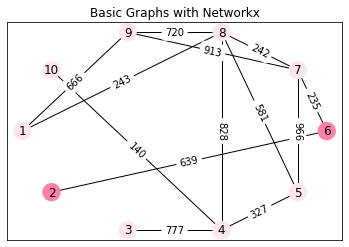

In [ ]:
visualize(N,label)

#Conditional Entropy

In [ ]:
filename = '/content/drive/My Drive/DM2/Dataset/ground_truth.txt'
r = 1 # row number
with open(filename, 'r') as f:
    l = [[int(num) for num in line.split(' ')] for line in f]
True_clustring = np.array(l)
print(True_clustring[1])

drv.entropy_conditional(True_clustring[1],label)

[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]


array(0.9635472)

In [ ]:
def entropy(Y):
    unique, count = np.unique(Y, return_counts=True, axis=0)
    print(unique, count)
    print(len(Y))
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

#Joint Entropy
def jEntropy(Y,X):
    print("Y",Y)
    print("X",X)
    YX = np.c_[Y,X]
    print("joint")
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

In [ ]:
cEntropy(X=label, Y=True_clustring[r])

Y [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
X [0 1 0 0 0 1 0 0 0 0]
joint
[[0 0]
 [0 1]
 [1 0]
 [1 1]] [5 1 3 1]
10
[0 1] [8 2]
10


0.963547202339972

# F-Measure

In [ ]:
def FMeasure(label, True_clustring):
  print("label", label)
  print("True_clustring", True_clustring)

  YX = np.c_[label, True_clustring]
  unique_label, count_label = np.unique(YX, return_counts=True, axis=0)
  print(unique_label, count_label)
  unique_clustring, count_clustring = np.unique(label, return_counts=True, axis=0)
  print(unique_clustring, count_clustring)
  n = len(unique_label)

  prec = []
  rec = []
  max = []
  sumClass = []
  numclass = []
  maxCurrent = 0
  sumCurrent = 0
  current = 0
  current1 = 0
  for i in range(n):
    if current1 == unique_label[i][0]:
      #print("enter" + str(i))
      sumCurrent = sumCurrent + count_label[i]
      #print(sumCurrent)
    else :
      sumClass.append(sumCurrent)
      current1 = unique_label[i][0]
      sumCurrent = count_label[i]
      #print(sumCurrent)
    if current == unique_label[i][0]:
      if maxCurrent < count_label[i]:
        maxCurrent = count_label[i]
    else :
      #print("enter" + str(i))
      numclass.append(current)
      max.append(maxCurrent)

      current = unique_label[i][0]
      maxCurrent = count_label[i]

    if i == n-1 and len(max)!=len(count_clustring):
      sumClass.append(sumCurrent)
      numclass.append(current)
      max.append(maxCurrent)
    if i == n-1 and len(sumClass)!=len(count_clustring):
      #print("end" + str(sumCurrent))
      sumClass.append(sumCurrent)
      
  print("max",max)    
  print("numclass",numclass)    
  print("sumClass",sumClass)
  Fi = []
  for i in range(len(count_clustring)):
    precValue = max[i]/count_clustring[i]
    recValue = max[i]/sumClass[numclass[i]]
    prec.append(precValue)
    rec.append(recValue)
    Fi.append((2*precValue*recValue)/(recValue+precValue))
  print("prec",prec)    
  print("rec",rec)
  print("Fi",Fi)
  print("FMeasure= ",np.sum(Fi)/len(count_clustring))
  return prec, rec
#[0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2],[0,0,0,0,0,1,0,1,1,1,1,2,2,0,0,2,2,2]
prec, rec = FMeasure(label, True_clustring[r])

label [0 1 0 0 0 1 0 0 0 0]
True_clustring [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[[0 0]
 [0 1]
 [1 0]
 [1 1]] [5 3 1 1]
[0 1] [8 2]
max [5, 1]
numclass [0, 1]
sumClass [8, 2]
prec [0.625, 0.5]
rec [0.625, 0.5]
Fi [0.625, 0.5]
FMeasure=  0.5625


#Normalized-Cut 

In [ ]:
def NormalizedCut(label):
  print(label)
  unique_clustring, count_clustring = np.unique(label, return_counts=True, axis=0)
  print(unique_clustring, count_clustring)
  n = len(unique_clustring)
  print(A)
  WCC = np.zeros((n))
  NC = 0
  W = np.zeros((n,n))
  for i in range(0,len(A)):
    for j in range(i,len(A)):
      if i != j:
        W[label[i],label[j]] = W[label[i],label[j]] + math.exp(-0.01*A[i,j])
        W[label[j],label[i]] = W[label[j],label[i]] + math.exp(-0.01*A[i,j])

  for i in range(0,len(W)):
    for j in range(0,len(W)):
      if i == j:
        W[i,j] =  W[i,j] / 2
      if i != j:
        WCC[i] = WCC[i] +  W[i,j]
    NC = NC +  WCC[i] / ( WCC[i] + W[i,i])
    print(WCC[i] / ( WCC[i] + W[i,i]))    

  print("W = ",W)
  print("WCC = ",WCC)
  print("NC = ",NC)

NormalizedCut(label)
#W =  [[3.49348698e+01 1.50953692e+01]
#[1.50953692e+01 3.35651240e-03]]
#WCC =  [15.09536916 15.09536916]
#NC =  1.4634659012389317

[0 1 0 0 0 1 0 0 0 0]
[0 1] [8 2]
[[  0.   0.   0.   0.   0.   0.   0. 243. 666.   0.]
 [  0.   0.   0.   0.   0. 639.   0.   0.   0.   0.]
 [  0.   0.   0. 777.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 777.   0. 327.   0.   0. 828.   0. 140.]
 [  0.   0.   0. 327.   0.   0. 966. 581.   0.   0.]
 [  0. 639.   0.   0.   0.   0. 235.   0.   0.   0.]
 [  0.   0.   0.   0. 966. 235.   0. 242. 913.   0.]
 [243.   0.   0. 828. 581.   0. 242.   0. 720.   0.]
 [666.   0.   0.   0.   0.   0. 913. 720.   0.   0.]
 [  0.   0.   0. 140.   0.   0.   0.   0.   0.   0.]]
0.4635770657703049
0.9998888354686267
W =  [[1.74674349e+01 1.50953692e+01]
 [1.50953692e+01 1.67825620e-03]]
WCC =  [15.09536916 15.09536916]
NC =  1.4634659012389317
